In [1]:
#%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(ride_df, city_df, how='inner', on='city')

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

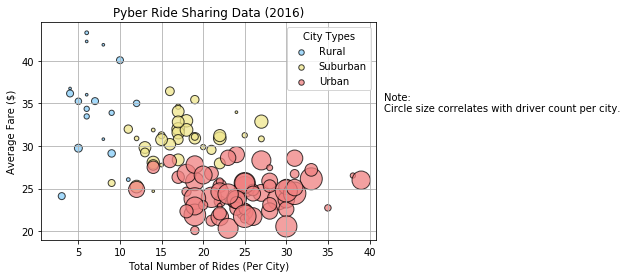

In [2]:
# Obtain the x and y coordinates for each of the three city types
avg_fare = df.groupby(['type','city','driver_count'])[['fare']].mean().reset_index()
tot_rides = df.groupby(['type','city','driver_count']).size().reset_index()
df_grouped = pd.merge(avg_fare, tot_rides, how='inner', on=['type','city','driver_count'])
df_grouped.columns = ['type','city','driver_count','mean_fare','ride_count']

# Build the scatter plots for each city types
fig, ax = plt.subplots()
groups = df_grouped.groupby('type')
colors = ["lightskyblue","khaki","lightcoral"]

# Plotting each group 
for i, (name, group) in enumerate(groups):
    group.plot(kind='scatter', x='ride_count', y='mean_fare', ylim=((19, 44.5)), xlim=((0.5, 40.75)),
               s=group['driver_count']*7, label=name, ax=ax, color=colors[i], 
               linewidths=1, edgecolor='black', alpha=.75)

# Incorporate the other graph properties
ax.set_title("Pyber Ride Sharing Data (2016)")
ax.set_xlabel('Total Number of Rides (Per City)', size=10)
ax.set_ylabel('Average Fare ($)', size=10)

# Add grid lines
plt.grid()

# Create a legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, title="City Types", fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([30])

# Incorporate a text label regarding circle size
textstr = 'Note:\nCircle size correlates with driver count per city.'
plt.gcf().text(.92, 0.57, textstr, fontsize=10)

# Save Figure
plt.savefig('bubbles.png')

# Show plot
plt.show()

## Total Fares by City Type

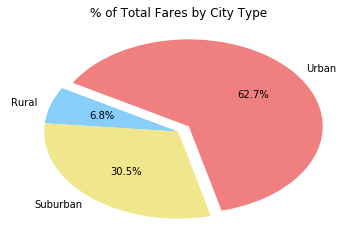

In [3]:
# Calculate Type Percents
df_type = df.groupby('type')['fare'].sum()
df_type.columns = ['type','total']

# Labels for the sections of our pie chart
labels = ['Rural','Suburban','Urban']

# The colors of each section of the pie chart
colors = ['lightskyblue','khaki','lightcoral']

# Seperate Urban section of pie from the others
explode = (0, 0, 0.1)

# Build Pie Chart
fig, ax = plt.subplots()
df_type.plot(kind='pie', y = 'total', ax=ax, explode=explode, colors=colors, autopct='%1.1f%%', 
             startangle=150, shadow=False, labels=labels, legend=False, fontsize=10)

# Incorporate the other graph properties
ax.set_title('% of Total Fares by City Type', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('')

# Save Figure
plt.savefig('pie_fare_pct.png')

# Show Plot
plt.show()

## Total Rides by City Type

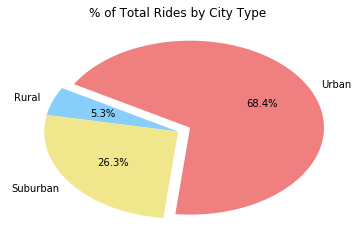

In [4]:
# Calculate Ride Percents
df_ride = df.groupby('type')['ride_id'].size()
df_ride.columns = ['type','total']

# Labels for the sections of our pie chart
labels = ['Rural','Suburban','Urban']

# The colors of each section of the pie chart
colors = ['lightskyblue','khaki','lightcoral']

# Seperate Urban section of pie from the others
explode = (0, 0, 0.1)

# Build Pie Chart
fig, ax = plt.subplots()
df_ride.plot(kind='pie', y = 'total', ax=ax, explode=explode, colors=colors, autopct='%1.1f%%', 
             startangle=150, shadow=False, labels=labels, legend=False, fontsize=10)

# Incorporate the other graph properties
ax.set_title('% of Total Rides by City Type', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('')

# Save Figure
plt.savefig('pie_ride_pct.png')

# Show Plot
plt.show()

## Total Drivers by City Type

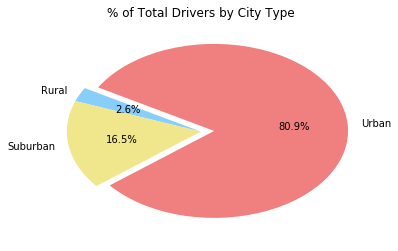

In [5]:
# Calculate Driver Percents
df_driver = city_df.groupby('type')['driver_count'].sum()
df_driver.columns = ['type','city','count']

# Labels for the sections of our pie chart
labels = ['Rural','Suburban','Urban']

# The colors of each section of the pie chart
colors = ['lightskyblue','khaki','lightcoral']

# Seperate Urban section of pie from the others
explode = (0, 0, 0.1)

# Build Pie Chart
fig, ax = plt.subplots()
df_driver.plot(kind='pie', y = 'total', ax=ax, explode=explode, colors=colors, autopct='%1.1f%%', 
             startangle=150, shadow=False, labels=labels, legend=False, fontsize=10)

# Incorporate the other graph properties
ax.set_title('% of Total Drivers by City Type', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('')

# Save Figure
plt.savefig('pie_driver_pct.png')

# Show Plot
plt.show()